# Final analysis

This notebook contains the final form of our analysis as well as the final form of the data cleaning process.

In [132]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
path = r'/home/daniel/code/costofcare/data/bhp_ukhls_data_stata/UKDA-6614-stata/stata/ukhls'
all_files = glob.glob(os.path.join(path , '*indresp.dta'))
raw_colnames = ['hidp',
                'sex',
                'jbnssec_dv',
                'jbnssec8_dv',
                'jbstat',
                'jbhrs',
                'ethn_dv',
                'dvage',
                'mastat_dv',
                'country',
                'aidhh',
                'aidhrs',
                'aidxhh',
                'paygu_dv',
                'qfhigh',
                'qfhigh_dv',
                'istrtdatm',
                'istrtdaty',
                'month']
indresp = []
prefixes = [] # for later
for filename in all_files:
    prefix = filename.split('/')[-1][0:2]
    prefixes.append(prefix)
    colnames = [f'{prefix}{x}' for x in raw_colnames]
    temp_df = pd.read_stata(filename,
                       columns=['pidp'] + colnames)
    indresp.append(temp_df)

In [133]:
for i, df in enumerate(indresp):
    df['wave'] = i+1
    df.columns = ['pidp',
                'hidp',
                'sex',
                'jbnssec_dv',
                  'jbnssec8_dv',
                'jbstat',
                'jbhrs',
                'ethn_dv',
                'dvage',
                'mastat_dv',
                'country',
                'aidhh',
                'aidhrs',
                'aidxhh',
                'paygu_dv',
                'qfhigh',
                'qfhigh_dv',
                'istrtdatm',
                'istrtdaty',
                'month',
                 'wave']

In [134]:
data = pd.concat(indresp)
data['max_waves'] = data.groupby('pidp')['wave'].transform('count')
len(data.pidp.unique())

88602

In [135]:
check = data[['wave', 'pidp', 'max_waves']]

In [136]:
len(check[check.max_waves > 5].pidp.unique())

40123

## Decision
We will consider that has at least six data points, whether or not they are consecutive or not, and whether or not they start from wave 1.

In [137]:
data_6 = data[data.max_waves > 5]
len(data_6.pidp.unique())

40123

# Treatment Variable

## Decision
Recoding treatment variable

In [138]:
import numpy as np
data_6['aidhh_recoded'] = data_6.aidhh.replace({'Yes': 'yes',
                                                'No': 'no',
                                                'no     ': 'no',
                                                'yes    ': 'yes',
                                                'Not available for IEMB': np.nan,
                                                "don't know": np.nan,
                                                'proxy': np.nan,
                                                'missing': np.nan,
                                                'refusal': np.nan,
                                                'inapplicable': np.nan})

/tmp/ipykernel_3654/1074845151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidhh_recoded'] = data_6.aidhh.replace({'Yes': 'yes',


In [139]:
data_6['aidxhh_recoded'] = data_6.aidxhh.replace({'Yes': 'yes',
                                                'No': 'no',
                                                'no     ': 'no',
                                                'yes    ': 'yes',
                                                'Not available for IEMB': np.nan,
                                                "don't know": np.nan,
                                                'proxy': np.nan,
                                                'missing': np.nan,
                                                'refusal': np.nan,
                                                'inapplicable': np.nan})

/tmp/ipykernel_3654/1333873410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidxhh_recoded'] = data_6.aidxhh.replace({'Yes': 'yes',


In [140]:
data_6['aidhrs_recoded_3'] = data_6.aidhrs.str.strip().replace({"inapplicable": np.nan,
                                   "0 - 4 hours per week": "0-19",
                                   "proxy": np.nan,
                                   "5 - 9 hours per week": "0-19",
                                   "10 - 19 hours per week": "0-19",
                                   "100 or more hours per week/continuous care": "50+",
                                   "20 - 34 hours per week": "20-49",
                                   "35 - 49 hours per week": "20-49",
                                   "varies 20 hours or more": "20-49",
                                   "0 - 4 hours per week": "0-19",
                                   "10-19 hours per week": "0-19",
                                   "Not available for IEMB": np.nan,
                                   "Varies 20 hours or more": "20-49",
                                   "varies under 20 hours": "0-19",
                                   "Varies under 20 hours": "0-19",
                                   "20-34 hours per week": "20-49",
                                   "5 - 9 hours per week": "0-19",
                                   "Other": np.nan,
                                   "10 - 19 hours per week": "0-19",
                                   "35-49 hours per week": "20-49",
                                   "100 or more hours per week/continuous care": "50+",
                                   "20 - 34 hours per week": "20-49",
                                   "50-99 hours per week": "50+",
                                   "other": np.nan,
                                   "don't know": np.nan,
                                   "35 - 49 hours per week": "20-49",
                                   "varies under 20 hours": "0-19",
                                   "50 - 99 hours per week": "50+",
                                   "other": np.nan,
                                   "refusal": np.nan}).copy()

/tmp/ipykernel_3654/2909938044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidhrs_recoded_3'] = data_6.aidhrs.str.strip().replace({"inapplicable": np.nan,


## Note
The variable below identifies the people who provided care under our specific conditions based on the 3 variables above.

In [141]:
data_6['carer'] = ((data_6.aidhh_recoded == 'yes') | (data_6.aidxhh_recoded == 'yes') | (~data_6.aidhrs_recoded_3.isnull()))

/tmp/ipykernel_3654/3799348870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['carer'] = ((data_6.aidhh_recoded == 'yes') | (data_6.aidxhh_recoded == 'yes') | (~data_6.aidhrs_recoded_3.isnull()))


Counting how many waves are carers taking care responsabilities on average

In [142]:
care_resp = data_6[['pidp', 'carer', 'wave']][data_6.carer]
care_resp['max_waves'] = care_resp.groupby('pidp')['wave'].transform('count')
care_resp.drop_duplicates(subset=['pidp']).max_waves.mean()

3.6293369616411115

## Decision
We will use a "generalised" moment of treatment with at least 3 measures before, and at least 1 after.

# Target Variable

In [143]:
data_6['jbstat_clean'] = data_6.jbstat.str.strip().str.lower() # cleaning values here

/tmp/ipykernel_3654/2089346174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['jbstat_clean'] = data_6.jbstat.str.strip().str.lower() # cleaning values here


In [144]:
data_6.jbstat_clean.value_counts()

paid employment(ft/pt)                     187734
retired                                     99318
self employed                               31006
family care or home                         19859
unemployed                                  16201
full-time student                           15962
lt sick or disabled                         13788
on maternity leave                           2151
doing something else                         1981
on furlough                                   387
on apprenticeship                             288
unpaid, family business                       261
govt training scheme                          232
refusal                                       131
temporarily laid off/short term working        63
don't know                                     47
missing                                        29
Name: jbstat_clean, dtype: int64

In [145]:
data_6['employed'] = data_6.jbstat_clean.replace({"paid employment(ft/pt)": "employed",
                             "retired": "unemployed",
                       "self employed": "employed",
                       "family care or home": "unemployed",
                       "unemployed": "unemployed",
                       "full-time student": "unemployed",
                       "lt sick or disabled": "unemployed",
                       "on maternity leave": "employed",
                       "doing something else": "unemployed",
                       "on furlough": "unemployed",
                       "on apprenticeship": "employed",
                       "unpaid, family business": "unemployed",
                       "govt training scheme": "employed",
                       "refusal": np.nan,
                       "temporarily laid off/short term working": "unemployed",
                       "don't know": np.nan,
                       "missing": np.nan}
                     )

/tmp/ipykernel_3654/2757714622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['employed'] = data_6.jbstat_clean.replace({"paid employment(ft/pt)": "employed",


Total Sample size

In [146]:
data_6[['pidp', 'carer']].drop_duplicates(subset=['pidp'])

,pidp,carer
1,68004087,False
2,68006127,False
4,68006807,False
11,68008847,False
12,68009527,False
...,...,...
41859,1636671692,True
41873,1638419292,True
41930,1644675490,False
41931,1644675530,False


Total number of carers in sample

In [147]:
data_6[['pidp', 'carer']].drop_duplicates(subset=['pidp'])['carer'].sum()

6529

Number of employed individuals in the sample

In [148]:
len(data_6[(data_6.employed == 'employed')].drop_duplicates(subset=['pidp']))

29337

Number of employed carers

In [149]:
data_6[(data_6.employed == 'employed')].drop_duplicates(subset=['pidp']).carer.sum()

4340

## Decision
We are considering only employed individuals

In [150]:
df_6_emp = data_6[(data_6.employed == 'employed')]

Cleaning wage variable

In [151]:
df_6_emp['wage'] = df_6_emp.paygu_dv.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan})

/tmp/ipykernel_3654/3065558054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['wage'] = df_6_emp.paygu_dv.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan})


In [152]:
df_6_emp.wage

1        1075.000000
11       1282.170044
12       4116.669922
14       2333.330078
16       2641.449951
            ...     
29258    4583.330078
29259    7000.000000
29260    1624.750000
29263    2800.000000
29267            NaN
Name: wage, Length: 221411, dtype: float64

Adding cpih to correct for inflation

In [153]:
cpih = pd.read_csv('./cpih_uk_88_23.csv')
cpih['date'] = pd.to_datetime(cpih.date, format='%b-%y')
cpih

,date,cpih
0,1988-01-01,46.9
1,1988-02-01,47.0
2,1988-03-01,47.2
3,1988-04-01,47.8
4,1988-05-01,48.0
...,...,...
416,2022-09-01,122.3
417,2022-10-01,124.3
418,2022-11-01,124.8
419,2022-12-01,125.3


In [154]:
df_6_emp['istrtdaty'] = df_6_emp['istrtdaty'].astype('str').replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
df_6_emp['istrtdatm'] = df_6_emp['istrtdatm'].replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
df_6_emp['date'] = df_6_emp['istrtdaty'].astype(str) + '/' + df_6_emp['istrtdatm'].astype(str)
df_6_emp['date'] = df_6_emp['date'].replace({'nan/nan': np.nan})
df_6_emp['date'] = pd.to_datetime(df_6_emp['date'], format='%Y/%B')
df_6_emp = df_6_emp.merge(cpih, on='date', how='left')

/tmp/ipykernel_3654/1591602359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['istrtdaty'] = df_6_emp['istrtdaty'].astype('str').replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
/tmp/ipykernel_3654/1591602359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['istrtdatm'] = df_6_emp['istrtdatm'].replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
/tmp/ipykernel_3654/1591602359.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [155]:
df_6_emp['jbhrs_clean'] = df_6_emp.jbhrs.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan, "don't know": np.nan, "refusal": np.nan, 0: np.nan})
df_6_emp['jbhrs_clean'][df_6_emp.jbhrs_clean < 1] = np.nan

/tmp/ipykernel_3654/295635728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['jbhrs_clean'][df_6_emp.jbhrs_clean < 1] = np.nan


In [156]:
df_6_emp['month_jbhrs'] = df_6_emp['jbhrs_clean'] * 4.33 # times the average amount of weeks

In [157]:
df_6_emp['wage_h'] = df_6_emp['wage'] / df_6_emp['month_jbhrs']

### Real wage calculation

In [158]:
df_6_emp['wage_h_deflated'] = (df_6_emp['wage_h'] / df_6_emp['cpih']) * 100

In [159]:
df_6_emp['wage_deflated'] = (df_6_emp['wage'] / df_6_emp['cpih']) * 100

# ISC Data preparation

In [160]:
isc_data = df_6_emp[['pidp', 'carer', 'wage_deflated', 'wage_h_deflated', 'wave', 'date', 'employed']]

In [161]:
isc_data


,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed
0,68004087,False,1241.339492,7.350859,1,2009-01-01,employed
1,68008847,False,1480.565871,8.767489,1,2009-01-01,employed
2,68009527,False,4753.660418,29.671434,1,2009-01-01,employed
3,68010887,False,2694.376534,16.817780,1,2009-01-01,employed
4,68011567,False,3050.173154,19.038594,1,2009-01-01,employed
...,...,...,...,...,...,...,...
221406,1652366050,False,3971.689842,24.790524,12,2022-02-01,employed
221407,1652814850,True,6134.969325,35.421301,12,2021-11-01,employed
221408,1652835250,False,1423.970202,8.888148,12,2021-11-01,employed
221409,1652984930,False,2441.533981,15.036391,12,2021-12-01,employed


In [162]:
isc_data[isc_data.pidp==68882647]

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed
376,68882647,False,1560.900682,22.530322,1,2009-01-01,employed
15385,68882647,False,1204.449394,23.180319,2,2010-02-01,employed
34842,68882647,False,1444.561166,16.680845,3,2011-02-01,employed
54615,68882647,False,838.574423,7.746646,4,2012-03-01,employed
74818,68882647,False,412.371134,3.968159,5,2013-01-01,employed
95282,68882647,True,NaN,NaN,6,2014-02-01,employed
116320,68882647,True,NaN,NaN,7,2015-05-01,employed
136870,68882647,True,NaN,NaN,8,2016-03-01,employed
191674,68882647,True,2013.633756,13.286927,11,2019-04-01,employed


In [163]:
isc_data

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed
0,68004087,False,1241.339492,7.350859,1,2009-01-01,employed
1,68008847,False,1480.565871,8.767489,1,2009-01-01,employed
2,68009527,False,4753.660418,29.671434,1,2009-01-01,employed
3,68010887,False,2694.376534,16.817780,1,2009-01-01,employed
4,68011567,False,3050.173154,19.038594,1,2009-01-01,employed
...,...,...,...,...,...,...,...
221406,1652366050,False,3971.689842,24.790524,12,2022-02-01,employed
221407,1652814850,True,6134.969325,35.421301,12,2021-11-01,employed
221408,1652835250,False,1423.970202,8.888148,12,2021-11-01,employed
221409,1652984930,False,2441.533981,15.036391,12,2021-12-01,employed


In [164]:
isc_copy = isc_data.copy()
to_drop = []
for pidp in isc_data.pidp.unique():
    temp_data = isc_data[isc_data.pidp==pidp].copy()
    if temp_data.wage_h_deflated.isnull().any():
        to_drop.append(pidp)
isc_copy = isc_copy[~isc_copy.pidp.isin(to_drop)]

In [165]:
isc_data = isc_copy.copy()

### Average number of waves caring

In [166]:
carer_events = []
for i in isc_data.pidp.unique():
    by_pidp = isc_data[isc_data.pidp == i]
    if by_pidp.carer.any():
        carer_events.append(by_pidp.carer.sum())
np.mean(carer_events)

3.1318141197497766

## Decision
We will take the average as lower limit to determine treated cases. Everyone with less than 3 and more than 1 reported waves of caring will be dropped.

In [167]:
isc_data['waves_caring'] = isc_data.groupby('pidp')['carer'].transform('sum')
isc_data = isc_data[~((isc_data.waves_caring >= 1) & (isc_data.waves_caring < 3))]

In [168]:
isc_data['wave_reindex'] = isc_data.sort_values(by=['pidp', 'wave']).groupby('pidp').cumcount() + 1
isc_data.reset_index(drop=True, inplace=True)
isc_data.sort_values(by=['pidp', 'wave_reindex'], inplace=True)

In [169]:
isc_data['wave_treat'] = isc_data.wave_reindex[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values

In [170]:
isc_data['wave_treat_real'] = isc_data.wave[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values

In [171]:
isc_data['initial_wave'] = isc_data.groupby('pidp')['wave'].transform('min').values

## Decision
Only carer with at least 3 data points before treatment are consider.

In [172]:
isc_data = isc_data.drop(isc_data[(isc_data.wave_treat < 4) & (isc_data.carer == True)].index)

In [173]:
def create_index(x):
    y = np.arange(len(x)) + 1
    return y - x

def create_relative_index(lst, point):
    index = lst.index(point)
    return [i - index for i in range(len(lst))]


In [174]:
isc_data['reindex'] = isc_data.groupby('pidp')['wave_treat'].transform(create_index)

In [175]:
isc_data

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed,waves_caring,wave_reindex,wave_treat,wave_treat_real,initial_wave,reindex
52495,76165,False,2710.843373,17.887452,7,2015-03-01,employed,0,1,1,7,7,0
61689,76165,False,3486.055777,23.002678,8,2016-03-01,employed,0,2,1,7,7,1
70471,76165,False,3793.604651,125.160167,9,2017-04-01,employed,0,3,1,7,7,2
78673,76165,False,3788.772598,25.000149,10,2018-03-01,employed,0,4,1,7,7,3
86432,76165,False,4000.000000,26.393929,11,2019-03-01,employed,0,5,1,7,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100237,1652835250,False,1423.970202,8.888148,12,2021-11-01,employed,0,6,1,6,6,5
52493,1652984890,False,3154.053707,33.109949,6,2015-12-01,employed,0,1,1,6,6,0
61687,1652984890,False,3110.677723,18.905298,7,2017-01-01,employed,0,2,1,6,6,1
52494,1653059650,False,2796.853049,16.148112,6,2016-02-01,employed,0,1,1,6,6,0


In [176]:
#isc_data = isc_data.dropna()

In [177]:
isc_data['ever_carer'] = isc_data.groupby('pidp')['carer'].transform(any)

In [178]:
carers = isc_data[isc_data.ever_carer]

In [179]:
controls = isc_data[~isc_data.ever_carer]

In [180]:
len(carers.pidp.unique())

648

In [181]:
def get_control_clean(c_data, t_data):
    samples = []
    t_ids = t_data.pidp.unique().tolist()
    for t_id in t_ids:
        out = {}
        init = t_data[t_data.pidp == t_id].initial_wave.unique()[0]
        treat_time = t_data[t_data.pidp == t_id].wave_treat_real.unique()[0]
        last_wave = t_data[t_data.pidp == t_id].wave.max()
        length = (last_wave + 1) - init
        # HUGE PROBLEM HERE waves need to match exactly!!! do not use range!!!
        idx = c_data[(c_data.wave >= init) & (controls.wave <= last_wave)].groupby('pidp')['pidp'].transform('count') == length
        sub_sample = c_data[(c_data.wave >= init) & (controls.wave <= last_wave)][idx].reset_index(drop=True)
        treat = t_data[t_data.pidp == t_id].pivot(index='wave', columns='pidp', values='wage_h_deflated')
        #treat.columns = ['treated']
        sub_sample = sub_sample.pivot(index='wave', columns='pidp', values='wage_h_deflated')
        sub_sample = pd.concat([treat, sub_sample], axis=1, join="inner")
        out['data'] = sub_sample
        out['treat_time'] = treat_time
        samples.append(out)
    return samples

In [182]:
def is_consecutive(l):
    return sorted(l) == list(range(min(l), max(l)+1))
idx = []
for pidp in carers.pidp:
    idx.append(is_consecutive(carers[carers.pidp == pidp].wave))

In [183]:
len(carers[idx].pidp.unique())

442

In [187]:
samples = get_control_clean(controls, carers[idx])

In [188]:
carers

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,employed,waves_caring,wave_reindex,wave_treat,wave_treat_real,initial_wave,reindex,ever_carer
17,68068011,False,3142.124802,19.612539,1,2009-01-01,employed,5,1,8,8,1,-7,True
6813,68068011,False,3137.759097,19.585289,2,2010-01-01,employed,5,2,8,8,1,-6,True
15809,68068011,False,3103.573070,19.371906,3,2011-01-01,employed,5,3,8,8,1,-5,True
24841,68068011,False,3035.902851,18.949522,4,2012-01-01,employed,5,4,8,8,1,-4,True
33934,68068011,False,2937.195957,18.333412,5,2013-01-01,employed,5,5,8,8,1,-3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70374,1633102291,False,1722.488038,18.943012,8,2018-01-01,employed,3,8,10,10,1,-2,True
78582,1633102291,False,1638.576779,18.020200,9,2019-02-01,employed,3,9,10,10,1,-1,True
86341,1633102291,True,1569.713758,17.262881,10,2020-01-01,employed,3,10,10,10,1,0,True
93577,1633102291,True,1715.462031,18.865743,11,2021-01-01,employed,3,11,10,10,1,1,True


In [189]:
samples[2]

{'data': pidp  68150971    68035367    68042167    68044207    68045567    68060527    \
 wave                                                                           
 2      10.519900   18.059163   24.015987   10.403013   17.533167   21.923473   
 3      10.199032   17.582557   25.205208   10.946832   16.771742   24.606865   
 4       9.683307   18.790988   25.085248   10.669405   16.259468   19.164899   
 5      10.793394   30.348789   23.594483   11.103215   12.632992   20.726002   
 6      11.547218   32.315474   24.337381   10.634685   13.671931   22.044729   
 7      10.455310   34.502454   24.384411   11.704135   18.457293   19.603667   
 8      11.431861   32.812946   19.953831   12.049022   18.650820   22.018349   
 9      11.644891   33.265448   23.955375   12.787756   19.154850   21.566421   
 10     11.536990   32.510647   23.390415   11.532143   19.113669   21.420884   
 11     11.601873   31.417872   23.377557   17.569695   18.741008   22.208679   
 12     11.495042   

In [190]:
from typing import List
from operator import add
from toolz import reduce, partial
import numpy as np
from scipy.optimize import minimize
from sklearn.neighbors import KDTree


# the expression to minimise, since \mu is 0, we are one looking for \omega/W
def argmin_w(W, Y_i, Y_0):
    return np.sqrt(np.sum((Y_0 - Y_i.dot(W))**2))


# a function wrapping the whole process
def get_w(Y_i, Y_0):
    w_start = [1/Y_i.shape[1]]*Y_i.shape[1]
    weights = minimize(partial(argmin_w, Y_i=Y_i, Y_0=Y_0),
                       np.array(w_start),
                       method='SLSQP',
                       constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}), # constraint to sum to 1
                       bounds=[(0.0, 1.0)]*len(w_start),
                       )
    return weights.x


def isc(data_objects: list) -> dict:
    synths = []
    treats = []
    diffs = []
    std_diffs = []
    for ele in data_objects:
        data = ele['data'].copy()
        t_time = ele['treat_time']
        data.sort_index(inplace=True)
        data.index = create_relative_index(data.index.tolist(), t_time)
        df_T0 = data.loc[:-1, :] # this needs to be revised
        Y_0 = df_T0.iloc[:, 0].values
        kdt = KDTree(df_T0.T, leaf_size=30, metric='euclidean')
        idx = kdt.query(df_T0.T, k=100, return_distance=False)[0, 1:]
        Y_i = df_T0.iloc[:, idx].values
        weights = get_w(Y_i, Y_0)
        synth = data.iloc[:, idx].dot(weights) # synthetic control is now based on the new subset of observations
        treated = data.iloc[:, 0]
        #synth.plot()
        #treated.plot()
        diff = treated - synth
        diff.plot()
        std_diff = (diff - diff.mean())/ diff.std()
        #std_diff.plot()
        #std_diff_b = 
        synths.append(synth)
        treats.append(treated)
        diffs.append(diff)
        std_diffs.append(std_diff)
    return {'synths': synths, 'treats': treats, 'diffs': diffs, 'std_diffs': std_diffs}


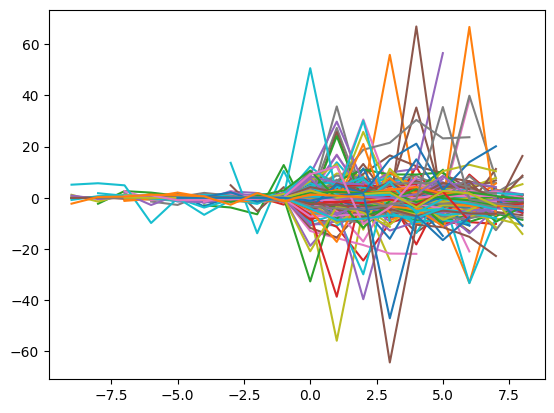

In [191]:
isc_list = isc(samples)

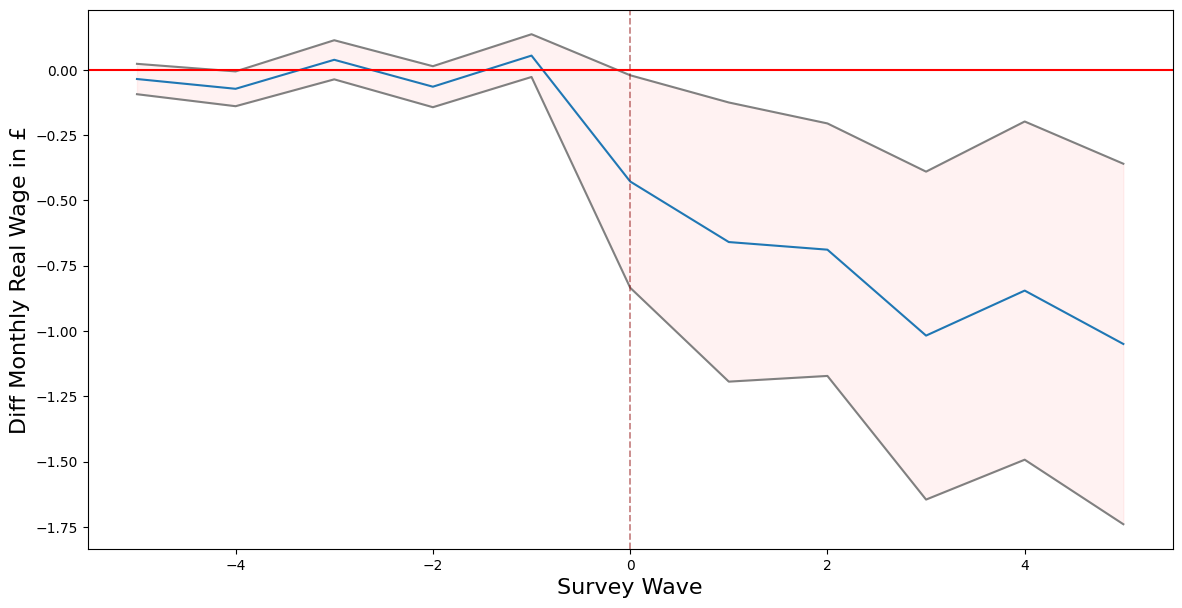

In [192]:
import math
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

figure(figsize=(14, 7))
differences = pd.concat(isc_list['diffs'], axis=1).sort_index()
differences.loc[-5:5].mean(axis=1).plot()
(differences.loc[-5:5].mean(axis=1) + (1.96*(differences.loc[-5:5].std(axis=1)/differences.loc[-5:5].count(axis=1).apply(math.sqrt)))).plot(color='grey')
(differences.loc[-5:5].mean(axis=1) - (1.96*(differences.loc[-5:5].std(axis=1)/differences.loc[-5:5].count(axis=1).apply(math.sqrt)))).plot(color='grey')
differences.count()
plt.axvline(x=0, linestyle='--', color='darkred', alpha=.5, linewidth=1.25)
plt.xlabel('Survey Wave', fontsize=16)
plt.ylabel('Diff Monthly Real Wage in £', fontsize=16)
plt.axhline(y=0, color='r', linestyle='-')
plt.fill_between(x=differences.loc[-5:5].index,
                 y1=differences.loc[-5:5].mean(axis=1) + (1.96*(differences.loc[-5:5].std(axis=1)/differences.loc[-5:5].count(axis=1).apply(math.sqrt))),
                 y2=differences.loc[-5:5].mean(axis=1) - (1.96*(differences.loc[-5:5].std(axis=1)/differences.loc[-5:5].count(axis=1).apply(math.sqrt))),
                     color='red', alpha=0.05)
plt.show()

In [155]:
differences.count(axis=1)

-9     14
-8     46
-7     94
-6    177
-5    303
-4    480
-3    702
-2    702
-1    702
 0    702
 1    702
 2    702
 3    620
 4    514
 5    412
 6    289
 7    152
 8     59
dtype: int64

In [56]:
def select_consecutive(series, value, consecutive_count):
    # Convert series to a list
    data = list(series)
    
    # Initialize counters
    count = 0
    
    # Iterate through the list
    for i in range(len(data)):
        if data[i] == value:
            count += 1
            print(count)
            if count == consecutive_count:
                return True
                break
        else:
            count = 0
    return False


In [57]:
# Example usage
my_series = pd.Series([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

select_consecutive(my_series, 1, 5)


1
2
3
1
1
2
3
4


False

In [68]:
l = [6,8, 7,9]



True

In [83]:
def is_consecutive(l):
    return sorted(l) == list(range(min(l), max(l)+1))
idx = []
for pidp in carers.pidp:
    idx.append(is_consecutive(carers[carers.pidp == pidp].wave))

In [87]:
carers[idx]

3    2016
4    1212
5     859
6     521
7     355
8     167
9     132
Name: waves_caring, dtype: int64